# Análise de Impactos de isolamento social em animais durante a pandemia

- Avaliar a correlação entre a quantidade de pessoas na casa e a adoção de animais na pandemia ✅

- T-student para comparar falta de apetite e apetite exagerado ✅

- T-student comparando animais quietos e inquietos ✅

- ANOVA(fator único) entre múltiplos grupos

- Fazer teste de Turkey para verificar quais desses grupos tem mais significância

<hr>

In [65]:
# Bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import itertools

sns.set()

from scipy.stats import norm
from scipy.stats import t as t_student, f_oneway as anova
from statsmodels.stats.weightstats import ttest_ind, ztest
from statsmodels.stats.multicomp import pairwise_tukeyhsd as tukey, tukeyhsd as tukey_results

In [5]:
df = pd.read_csv('dados2.csv', encoding='utf8', sep=';')
df.head()

,Idade,Escolaridade,Gênero,Quantas pessoas moram na casa ?,Durante a pandemia de COVID-19 o número de indivíduos residindo em sua casa aumentou?,Quantos animais você já possuía antes da pandemia de Covid-19? [Gatos],Quantos animais você já possuía antes da pandemia de Covid-19? [Cães],Quantos animais você adquiriu durante a pandemia de Covid-19? [Gatos],Quantos animais você adquiriu durante a pandemia de Covid-19? [Cães],"Caso você tenha adquirido algum animal durante a pandemia de Covid-19, foi realizado alguma adaptação na sua casa para inserir o novo animal ?",...,"Em uma escala de 1 à 10 avalie se o pelo do seu animal começou a cair mais durante a pandemia de Covid-19, onde 1 representa pouco ou nenhuma queda de pelo e 10 representa muita queda de pelo.","Em uma escala de 1 à 10 avalie se seu animal começou a lamber o corpo ou se morder de maneira exacerbada durante a pandemia de Covid-19, onde 1 representa pouca lambedura/mordedura e 10 representa muita lambedura/mordedura.","Em uma escala de 1 à 10 avalie se seu animal começou a se coçar de maneira exagerada durante a pandemia de Covid-19, onde 1 representa pouca ou nenhuma coceira e 10 representa muita coceira.","Em uma escala de 1 à 10 avalie se seu animal passou a se automutilar (machucar a si próprio)? durante a pandemia de Covid-19, onde 1 representa pouca ou nenhuma automutilação e 10 representa alto nível de automutilação .","Em uma escala de 1 à 10 avalie se seu animal passou a arranhar/morder objetos durante a pandemia de Covid-19, onde 1 representa pouca ou nenhuma arranhadura/mordida e 10 representa exacerbada arranhadura/mordida.","Em uma escala de 1 à 10 avalie se seu animal mostra-se mais cansado ( muito tempo deitado, dormia muito...)durante a pandemia de Covid-19, onde 1 representa pouco ou nenhum cansaço e 10 representa muito cansado.","Em uma escala de 1 à 10 avalie se seu animal durante a pandemia de Covid-19 demonstra-se mais agressivo, onde 1 representa pouca ou nenhuma agressividade e 10 representa muita agressividade.","Em uma escala de 1 à 10 avalie se seu animal durante a pandemia de Covid-19 demonstra-se mais carente, onde 1 representa pouco carente e 10 representa muito carente.","Em uma escala de 1 à 10 avalie se seu animal durante a pandemia de Covid-19 passou a demonstrar falta de apetite, onde 1 representa pouca ou nenhuma falta de apetite e 10 representa muita falta de apetite.","Em uma escala de 1 à 10 avalie se seu animal durante a pandemia de Covid-19 passou a apresentar apetite exagerado, onde 1 representa pouca ou nenhum apetite exagerado e 10 representa muito apetite exagerado."
0,18 a 25 anos,Ensino superior incompleto,Feminino,3,Não,2,0,1,0,Não,...,1,1,1,2,2,1,2,8,1,10
1,26 a 30 anos,Ensino superior completo,Feminino,3,Não,0,2,0,1,Sim,...,8,1,1,1,4,2,1,5,1,1
2,18 a 25 anos,Ensino superior incompleto,Feminino,4,Não,0,4,1,0,Sim,...,4,1,6,2,2,1,1,1,2,2
3,18 a 25 anos,Ensino superior incompleto,Feminino,6,Não,5,5,0,0,Não se aplica,...,5,7,4,1,2,2,1,5,1,5
4,26 a 30 anos,Pós-graduação,Masculino,2,Não,1,0,1,0,Não,...,1,1,1,1,5,5,1,1,1,1


In [35]:
# Numeração das Colunas

len(df.columns)
for i in range(len(df.columns)):
    if i >= 18 and i <=27:
        print(f'{i} - {df.columns[i]}')

18 - Em uma escala de 1 à 10 avalie se com a pandemia de Covid-19 você NOTOU TRISTEZA no seu animal (o animal se isola, chora), onde 1 representa  pouca ou nenhuma tristeza e 10  representa muita tristeza.
19 - Em uma escala de 1 à 10 avalie se com a pandemia de Covid-19 seu animal COMEÇOU A MIAR/LATIR mais, onde 1 representa  pouco ou nenhum miado/latido  e 10  representa muito miado/latido.
20 - Em uma escala de 1 à 10 avalie se o pelo do seu animal começou a cair mais durante a pandemia de Covid-19, onde 1 representa  pouco  ou nenhuma queda de pelo   e 10  representa muita queda de pelo.
21 - Em uma escala de 1 à 10 avalie se seu animal começou a lamber o corpo ou se morder de maneira exacerbada durante a pandemia de Covid-19, onde 1 representa pouca lambedura/mordedura e 10 representa muita lambedura/mordedura. 
22 - Em uma escala de 1 à 10 avalie se seu animal começou a se coçar de maneira exagerada durante a pandemia de Covid-19, onde 1 representa  pouca ou nenhuma coceira  e 10

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantas pessoas moram na casa ?,116.0,3.094828,1.395511,1.0,2.00,3.0,4.00,7.0
Quantos animais você já possuía antes da pandemia de Covid-19? [Gatos],116.0,1.112069,1.586747,0.0,0.00,0.0,2.00,6.0
Quantos animais você já possuía antes da pandemia de Covid-19? [Cães],116.0,0.974138,1.066984,0.0,0.00,1.0,1.00,5.0
Quantos animais você adquiriu durante a pandemia de Covid-19? [Gatos],116.0,0.491379,1.107254,0.0,0.00,0.0,1.00,6.0
Quantos animais você adquiriu durante a pandemia de Covid-19? [Cães],116.0,0.181034,0.468098,0.0,0.00,0.0,0.00,3.0
"Em uma escala de 1 à 10 onde 1 representa pouca mudança e 10 representa grande mudança, avalie se a rotina de seu animal mudou DURANTE A QUARENTENA DA PANDEMIA DE COVID-19 (passeios, frequência da alimentação, horário da alimentação, brincadeiras por exemplo)?",116.0,4.689655,2.751802,1.0,2.75,5.0,7.00,10.0
"Em uma escala de 1 à 10 avalie se DURANTE A QUARENTENA DA PANDEMIA DE COVID-19 seu animal demonstrou-se mais INQUIETO, onde 1 representa pouco inquieto e 10 representa muito inquieto.",116.0,4.534483,2.808159,1.0,2.00,4.0,7.00,10.0
"Em uma escala de 1 à 10 avalie DURANTE A QUARENTENA DA PANDEMIA DE COVID-19 seu animal tem se demonstrado mais QUIETO, onde 1 representa pouco quieto e 10 representa muito quieto.",116.0,4.258621,2.628012,1.0,2.00,4.0,6.00,10.0
"Em uma escala de 1 à 10 avalie se você notou alteração no comportamento do seu animal DURANTE A QUARENTENA DA PANDEMIA DE COVID-19, onde 1 representa poucas alterações e 10 representa muitas alterações.",116.0,3.887931,2.643356,1.0,1.00,4.0,6.00,10.0
"Em uma escala de 1 à 10 avalie se com a pandemia de Covid-19 você NOTOU TRISTEZA no seu animal (o animal se isola, chora), onde 1 representa pouca ou nenhuma tristeza e 10 representa muita tristeza.",116.0,3.008621,2.390182,1.0,1.00,2.0,4.00,10.0


## Análise de Correlação entre quantidade de pessoas na casa e adoção de animais

In [7]:
anl1 = df.rename(columns={
    df.columns[3]: 'num_pessoas',
    df.columns[7]: 'gatos',
    df.columns[8]: 'cachorros'
})
anl1.drop(anl1.columns.difference(['num_pessoas','gatos', 'cachorros']), 1, inplace=True)


C:\Users\josue\AppData\Local\Temp/ipykernel_1028/850398624.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  anl1.drop(anl1.columns.difference(['num_pessoas','gatos', 'cachorros']), 1, inplace=True)


In [8]:
anl1

,num_pessoas,gatos,cachorros
0,3,1,0
1,3,0,1
2,4,1,0
3,6,0,0
4,2,1,0
...,...,...,...
111,1,1,0
112,2,1,0
113,2,1,0
114,1,1,0


In [9]:
anl1['animal'] = anl1['gatos'] + anl1['cachorros']
anl1.corr(method='pearson')

,num_pessoas,gatos,cachorros,animal
num_pessoas,1.000000,0.211568,0.199790,0.263797
gatos,0.211568,1.000000,0.095312,0.927021
cachorros,0.199790,0.095312,1.000000,0.461657
animal,0.263797,0.927021,0.461657,1.000000


<AxesSubplot:>

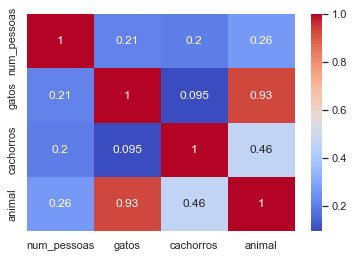

In [10]:
sns.heatmap(anl1.corr(method='pearson'), annot=True, cmap='coolwarm')

Interpretação: pelo baixo número de correlação não dá para afirmar que pessoas que moram sozinhas adotaram mais animais.
- Para gatos, a correlação de Pearson deu 0,21
- Para cães, a correlação de Pearson deu 0,19
- Para ambos, a correlação deu 0,26

Pelo gráfico do excel, pessoas que moram em residência com 5 membros adotaram mais animais durante o período da pandemia.

In [79]:
df[df.columns[3]]

0      3
1      3
2      4
3      6
4      2
      ..
111    1
112    2
113    2
114    1
115    5
Name:  Quantas pessoas moram na casa ?, Length: 116, dtype: int64

In [115]:
anl2 = pd.DataFrame()
pessoas = pd.concat([df[df.columns[3]], df[df.columns[3]], df[df.columns[3]]], ignore_index=True)
animais = pd.concat([df[df.columns[7]], df[df.columns[8]], anl1['animal']], ignore_index=True)
rotulos = pd.Series(['Gatos', 'Cachorros', 'Ambos'])

anl2['# Pessoas'] = pessoas
anl2['# Animais'] = animais
anl2['Animal'] = rotulos.repeat(116).reset_index().drop(columns='index')

In [116]:
anl2

,# Pessoas,# Animais,Animal
0,3,1,Gatos
1,3,0,Gatos
2,4,1,Gatos
3,6,0,Gatos
4,2,1,Gatos
...,...,...,...
343,1,1,Ambos
344,2,1,Ambos
345,2,1,Ambos
346,1,1,Ambos


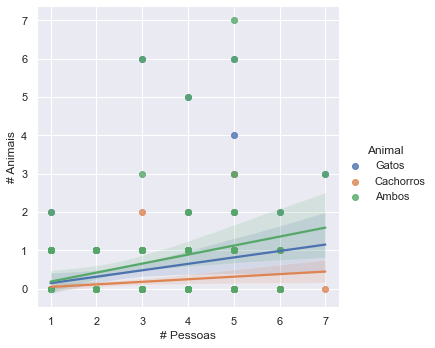

In [117]:
sns.lmplot(x='# Pessoas', y='# Animais', hue='Animal', data=anl2)

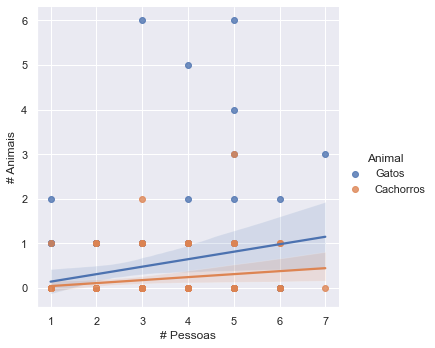

In [118]:
anl3 = pd.DataFrame()
pessoas = pd.concat([df[df.columns[3]], df[df.columns[3]]], ignore_index=True)
animais = pd.concat([df[df.columns[7]], df[df.columns[8]]], ignore_index=True)
rotulos = pd.Series(['Gatos', 'Cachorros'])

anl3['# Pessoas'] = pessoas
anl3['# Animais'] = animais
anl3['Animal'] = rotulos.repeat(116).reset_index().drop(columns='index')
sns.lmplot(x='# Pessoas', y='# Animais', hue='Animal', data=anl3)

sns.lmplot(x="FlyAsh", y="Strength", hue="AirEntrain", data=con);

In [11]:
anl1.num_pessoas.value_counts()

2    32
3    29
4    23
1    13
5    12
6     6
7     1
Name: num_pessoas, dtype: int64

## T-Student para Apetite

In [12]:
fa = df.columns[28]
ae = df.columns[29]

In [13]:
falta_apetite = df[fa]
apetite_exagerado = df[ae]

In [14]:
falta_apetite.name = 'Falta de Apetite'
apetite_exagerado.name = 'Apetite Exagerado'

In [15]:
ttest_ind(falta_apetite, apetite_exagerado, alternative='two-sided')

(-5.011819353948068, 1.0756422327568345e-06, 230.0)

<AxesSubplot:xlabel='Falta de Apetite', ylabel='Count'>

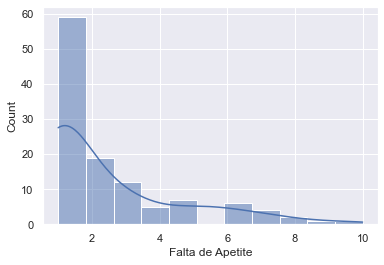

In [16]:
sns.histplot(falta_apetite, kde=True)

<AxesSubplot:xlabel='Apetite Exagerado', ylabel='Count'>

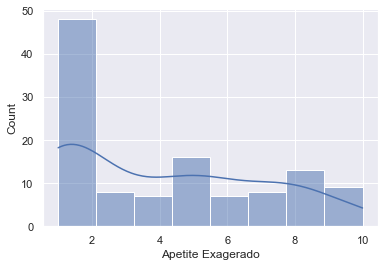

In [17]:
sns.histplot(apetite_exagerado, kde=True)

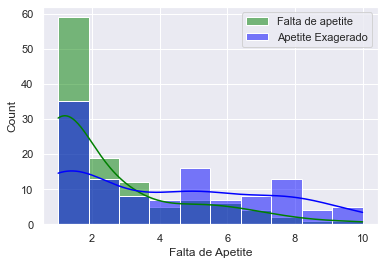

In [18]:


sns.histplot(falta_apetite, color="green", label="Falta de apetite", kde=True, bins=10)
sns.histplot(apetite_exagerado, color="blue", label="Apetite Exagerado", kde=True, bins=10)

plt.legend() 
plt.show()

Interpretação: Pelo teste T, é rejeitada a hipótese nula de que as duas distribuições apresentam a mesma média, pois seu valor P foi de $1.075\cdot 10^{-6} < 0.05$. Ou seja, houve diferenças significativas entre os animais que tiveram falta de apetite e apetite exagerado durante o isolamento.

P < 0.05 : rejeitar H0

## T-Student Inquieto e Quieto

In [26]:
inq = df.columns[15]
qui = df.columns[16]

In [43]:
inquieto = df[inq]
quieto = df[qui]
inquieto.name = 'Inquieto'
quieto.name = 'Quieto'

In [30]:
ttest_ind(inquieto, quieto, alternative='two-sided')

(0.7725107674030619, 0.440605067125745, 230.0)

<AxesSubplot:xlabel='Inquieto', ylabel='Count'>

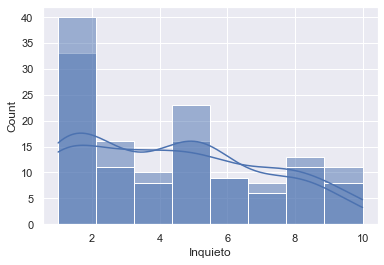

In [28]:
sns.histplot(inquieto, kde=True)
sns.histplot(quieto, kde=True)


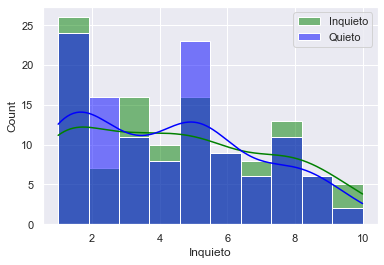

In [31]:
sns.histplot(inquieto, color="green", label="Inquieto", kde=True, bins=10)
sns.histplot(quieto, color="blue", label="Quieto", kde=True, bins=10)

plt.legend() 
plt.show()

Interpretação: Pelo teste T, a hipótese nula é aceita. Isto significa que as duas distribuições não apresentam diferenças significativas em suas médias, pois seu valor P foi de $0.44 > 0.05$. Ou seja, não houve diferenças significativas entre a ditribuição de animais que demonstraram comportamento de quietude ou inquietude durante a pandemia.

## ANOVA

In [40]:
tristeza        = df[df.columns[18]] # tristeza
miado           = df[df.columns[19]] # miado/latido
queda           = df[df.columns[20]] # queda de pelo
lambedura       = df[df.columns[21]] # lambedura/mordedura
coceira         = df[df.columns[22]] # coceira
automutilacao   = df[df.columns[23]] # automutilação
arranhadura     = df[df.columns[24]] # arranhadura
cansaco         = df[df.columns[25]] # cansaço
agressividade   = df[df.columns[26]] # agressividade
carencia        = df[df.columns[27]] # carência

In [41]:
anova(tristeza, miado, queda, lambedura, coceira, automutilacao, arranhadura, cansaco, agressividade, carencia)

F_onewayResult(statistic=21.43255176619136, pvalue=8.767918202679636e-34)

Interpretação: O teste ANOVA para as variáveis deu um valor P de $8.77 \cdot 10^{-34} < 0.05$. Isto significa que há diferença significativa entre as variáveis analisadas.

## Tukey

In [60]:
variaveis = pd.DataFrame({'score': itertools.chain(tristeza, miado, queda, lambedura, coceira, automutilacao, arranhadura, cansaco, agressividade, carencia),
                   'group': np.repeat(['tristeza', 'miado', 'queda', 'lambedura', 'coceira', 'automutilacao', 'arranhadura', 'cansaco', 'agressividade', 'carencia'], repeats=116)}) 

# perform Tukey's test
tabela_tukey = tukey(endog=variaveis['score'],
                     groups=variaveis['group'],
                     alpha=0.05)
print(tabela_tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
agressividade   arranhadura   0.4052    0.9 -0.7152  1.5255  False
agressividade automutilacao  -0.8017 0.4138 -1.9221  0.3186  False
agressividade       cansaco   1.6207  0.001  0.5003  2.7411   True
agressividade      carencia   3.4138  0.001  2.2934  4.5342   True
agressividade       coceira   0.8793 0.2761 -0.2411  1.9997  False
agressividade     lambedura   1.3276 0.0069  0.2072  2.4479   True
agressividade         miado    1.569  0.001  0.4486  2.6893   True
agressividade         queda   1.6121  0.001  0.4917  2.7324   True
agressividade      tristeza   0.3448    0.9 -0.7755  1.4652  False
  arranhadura automutilacao  -1.2069 0.0231 -2.3273 -0.0865   True
  arranhadura       cansaco   1.2155 0.0213  0.0952  2.3359   True
  arranhadura      carencia   3.0086  0.001  1.8883   4.129   

Resultados:
- True: Há uma diferença significativa entre os grupos
- False: Não há diferença significativa entre os grupos

Observou-se que a variável "carência" é significativamente diferente de todos os grupos e possui a maior diferença de média.
Por outro lado, a variável "coceira" não é significativamente diferente quando comparada a 7 dos outros grupos.

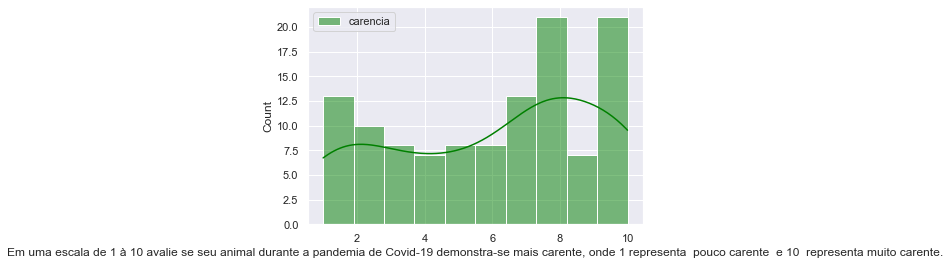

In [67]:
sns.histplot(carencia, color="green", label="carencia", kde=True, bins=10)

plt.legend() 
plt.show()

In [70]:
df_estresse = pd.DataFrame()
df_estresse['Tristeza'] = tristeza     
df_estresse['Miado'] = miado           
df_estresse['Queda'] = queda           
df_estresse['Lambedura'] = lambedura      
df_estresse['Coceira'] = coceira         
df_estresse['AutoMuti'] = automutilacao  
df_estresse['Arranhadura'] = arranhadura    
df_estresse['Cansaço'] = cansaco        
df_estresse['Agressividade'] = agressividade   
df_estresse['Carência'] = carencia        

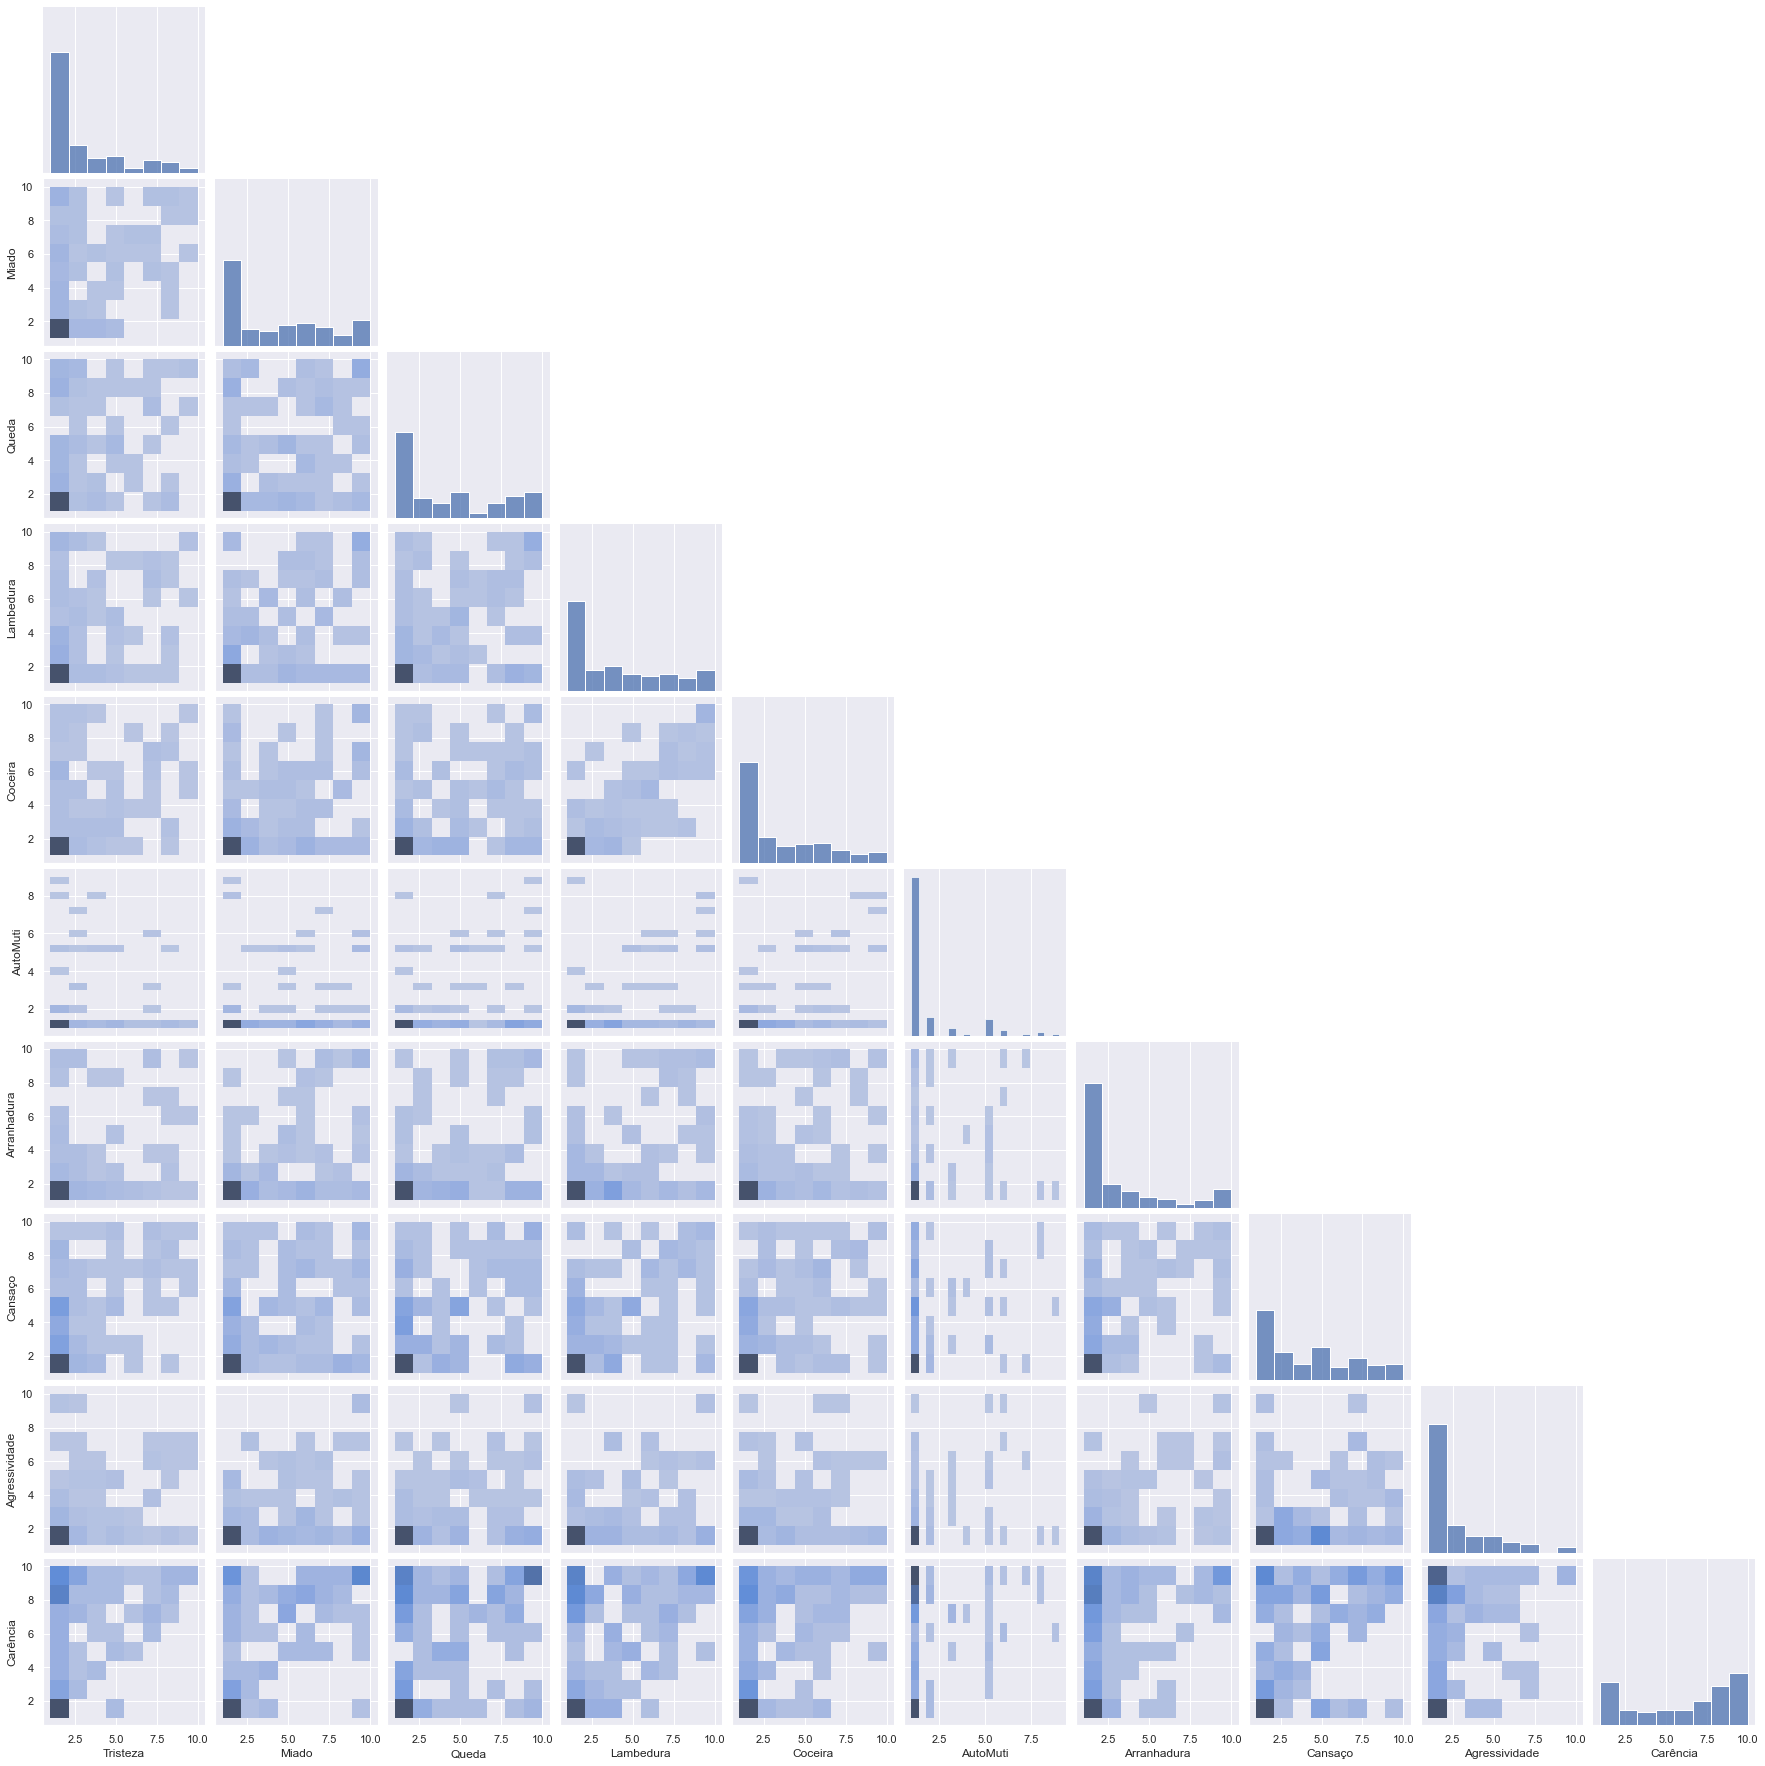

In [73]:
sns.pairplot(df_estresse, kind='hist', corner=True)